Esse notebook é o original da solução que verificamos.

Estaremos analisando e escrevendo comentários a respeito.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Importação de bibliotecas

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
import matplotlib.pyplot as plt
# import os, math
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, classification_report, confusion_matrix

Carregamento do dataset

In [3]:
link = 'C:/Users/CarlosViniMSouza/Documents/Projects/data-mining-ifam/database/Financial-Data.csv'

dfMerge = pd.read_csv(link)
dfMerge = dfMerge.iloc[:, 1:]
dfMerge

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,31,monthly,0,3245,0,5,3,2,6,1,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,46,bi-weekly,0,6525,0,2,1,3,3,1,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,46,weekly,0,2685,0,5,1,1,8,1,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,42,bi-weekly,0,2515,0,3,5,6,1,1,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


Inicio do trabalho do tratamento do dataset, nessa etapa iremos pular um pouco os comentários já que fizemos um tratamento próprio baseado e explicando essa parte.

In [4]:
dfMerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   17908 non-null  int64  
 1   pay_schedule          17908 non-null  object 
 2   home_owner            17908 non-null  int64  
 3   income                17908 non-null  int64  
 4   months_employed       17908 non-null  int64  
 5   years_employed        17908 non-null  int64  
 6   current_address_year  17908 non-null  int64  
 7   personal_account_m    17908 non-null  int64  
 8   personal_account_y    17908 non-null  int64  
 9   has_debt              17908 non-null  int64  
 10  amount_requested      17908 non-null  int64  
 11  risk_score            17908 non-null  int64  
 12  risk_score_2          17908 non-null  float64
 13  risk_score_3          17908 non-null  float64
 14  risk_score_4          17908 non-null  float64
 15  risk_score_5       

In [5]:
abs(dfMerge.corr()[['e_signed']].sort_values(['e_signed'])['e_signed']) < 0.01

C:\Users\CarlosViniMSouza\AppData\Local\Temp\ipykernel_2204\3442783011.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(dfMerge.corr()[['e_signed']].sort_values(['e_signed'])['e_signed']) < 0.01


age                     False
personal_account_m      False
home_owner              False
risk_score_3            False
ext_quality_score       False
inquiries_last_month    False
ext_quality_score_2     False
personal_account_y      False
current_address_year    False
risk_score_5             True
years_employed           True
risk_score_4             True
months_employed         False
risk_score_2            False
income                  False
has_debt                False
amount_requested        False
risk_score              False
e_signed                False
Name: e_signed, dtype: bool

In [6]:
dfMerge = dfMerge.drop(['risk_score_5', 'years_employed', 'risk_score_4'], axis=1)
dfMerge

,age,pay_schedule,home_owner,income,months_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,40,bi-weekly,1,3135,0,3,6,2,1,550,36200,0.737398,0.903517,0.580918,0.380918,10,1
1,61,weekly,0,3180,0,3,2,7,1,600,30150,0.738510,0.881027,0.730720,0.630720,9,0
2,23,weekly,0,1540,6,0,7,1,1,450,34550,0.642993,0.766554,0.531712,0.531712,7,0
3,40,bi-weekly,0,5230,0,1,2,7,1,700,42150,0.665224,0.960832,0.792552,0.592552,8,1
4,33,semi-monthly,0,3590,0,2,2,8,1,1100,53850,0.617361,0.857560,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,31,monthly,0,3245,0,3,2,6,1,700,71700,0.691126,0.928196,0.727705,0.627705,2,0
17904,46,bi-weekly,0,6525,0,1,3,3,1,800,51800,0.648525,0.970832,0.774918,0.474918,3,0
17905,46,weekly,0,2685,0,1,1,8,1,1200,59650,0.677975,0.918141,0.472045,0.672045,9,0
17906,42,bi-weekly,0,2515,0,5,6,1,1,400,80200,0.642741,0.885684,0.406568,0.406568,3,1


In [7]:
one = OneHotEncoder(cols=['pay_schedule']).fit_transform(dfMerge['pay_schedule'])
dfMerge = pd.concat([one, dfMerge.drop(['pay_schedule'], axis=1)], axis=1)
dfMerge

,pay_schedule_1,pay_schedule_2,pay_schedule_3,pay_schedule_4,age,home_owner,income,months_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,1,0,0,0,40,1,3135,0,3,6,2,1,550,36200,0.737398,0.903517,0.580918,0.380918,10,1
1,0,1,0,0,61,0,3180,0,3,2,7,1,600,30150,0.738510,0.881027,0.730720,0.630720,9,0
2,0,1,0,0,23,0,1540,6,0,7,1,1,450,34550,0.642993,0.766554,0.531712,0.531712,7,0
3,1,0,0,0,40,0,5230,0,1,2,7,1,700,42150,0.665224,0.960832,0.792552,0.592552,8,1
4,0,0,1,0,33,0,3590,0,2,2,8,1,1100,53850,0.617361,0.857560,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,0,0,0,1,31,0,3245,0,3,2,6,1,700,71700,0.691126,0.928196,0.727705,0.627705,2,0
17904,1,0,0,0,46,0,6525,0,1,3,3,1,800,51800,0.648525,0.970832,0.774918,0.474918,3,0
17905,0,1,0,0,46,0,2685,0,1,1,8,1,1200,59650,0.677975,0.918141,0.472045,0.672045,9,0
17906,1,0,0,0,42,0,2515,0,5,6,1,1,400,80200,0.642741,0.885684,0.406568,0.406568,3,1


In [8]:
dfMerge["personal_accounts_month"] = dfMerge["personal_account_y"] * 12 + dfMerge["personal_account_m"]
dfMerge = dfMerge.drop(["personal_account_y","personal_account_m"],axis=1)
dfMerge

,pay_schedule_1,pay_schedule_2,pay_schedule_3,pay_schedule_4,age,home_owner,income,months_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_accounts_month
0,1,0,0,0,40,1,3135,0,3,1,550,36200,0.737398,0.903517,0.580918,0.380918,10,1,30
1,0,1,0,0,61,0,3180,0,3,1,600,30150,0.738510,0.881027,0.730720,0.630720,9,0,86
2,0,1,0,0,23,0,1540,6,0,1,450,34550,0.642993,0.766554,0.531712,0.531712,7,0,19
3,1,0,0,0,40,0,5230,0,1,1,700,42150,0.665224,0.960832,0.792552,0.592552,8,1,86
4,0,0,1,0,33,0,3590,0,2,1,1100,53850,0.617361,0.857560,0.744634,0.744634,12,0,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,0,0,0,1,31,0,3245,0,3,1,700,71700,0.691126,0.928196,0.727705,0.627705,2,0,74
17904,1,0,0,0,46,0,6525,0,1,1,800,51800,0.648525,0.970832,0.774918,0.474918,3,0,39
17905,0,1,0,0,46,0,2685,0,1,1,1200,59650,0.677975,0.918141,0.472045,0.672045,9,0,97
17906,1,0,0,0,42,0,2515,0,5,1,400,80200,0.642741,0.885684,0.406568,0.406568,3,1,18


In [9]:
dfMerge['risk_score'] = round(np.log2(dfMerge['risk_score']), 4)
dfMerge

,pay_schedule_1,pay_schedule_2,pay_schedule_3,pay_schedule_4,age,home_owner,income,months_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_accounts_month
0,1,0,0,0,40,1,3135,0,3,1,550,15.1437,0.737398,0.903517,0.580918,0.380918,10,1,30
1,0,1,0,0,61,0,3180,0,3,1,600,14.8799,0.738510,0.881027,0.730720,0.630720,9,0,86
2,0,1,0,0,23,0,1540,6,0,1,450,15.0764,0.642993,0.766554,0.531712,0.531712,7,0,19
3,1,0,0,0,40,0,5230,0,1,1,700,15.3632,0.665224,0.960832,0.792552,0.592552,8,1,86
4,0,0,1,0,33,0,3590,0,2,1,1100,15.7167,0.617361,0.857560,0.744634,0.744634,12,0,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,0,0,0,1,31,0,3245,0,3,1,700,16.1297,0.691126,0.928196,0.727705,0.627705,2,0,74
17904,1,0,0,0,46,0,6525,0,1,1,800,15.6607,0.648525,0.970832,0.774918,0.474918,3,0,39
17905,0,1,0,0,46,0,2685,0,1,1,1200,15.8642,0.677975,0.918141,0.472045,0.672045,9,0,97
17906,1,0,0,0,42,0,2515,0,5,1,400,16.2913,0.642741,0.885684,0.406568,0.406568,3,1,18


In [10]:
dfMerge = dfMerge.drop(['months_employed'], axis=1)
dfMerge

,pay_schedule_1,pay_schedule_2,pay_schedule_3,pay_schedule_4,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_accounts_month
0,1,0,0,0,40,1,3135,3,1,550,15.1437,0.737398,0.903517,0.580918,0.380918,10,1,30
1,0,1,0,0,61,0,3180,3,1,600,14.8799,0.738510,0.881027,0.730720,0.630720,9,0,86
2,0,1,0,0,23,0,1540,0,1,450,15.0764,0.642993,0.766554,0.531712,0.531712,7,0,19
3,1,0,0,0,40,0,5230,1,1,700,15.3632,0.665224,0.960832,0.792552,0.592552,8,1,86
4,0,0,1,0,33,0,3590,2,1,1100,15.7167,0.617361,0.857560,0.744634,0.744634,12,0,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,0,0,0,1,31,0,3245,3,1,700,16.1297,0.691126,0.928196,0.727705,0.627705,2,0,74
17904,1,0,0,0,46,0,6525,1,1,800,15.6607,0.648525,0.970832,0.774918,0.474918,3,0,39
17905,0,1,0,0,46,0,2685,1,1,1200,15.8642,0.677975,0.918141,0.472045,0.672045,9,0,97
17906,1,0,0,0,42,0,2515,5,1,400,16.2913,0.642741,0.885684,0.406568,0.406568,3,1,18


In [11]:
dfMerge['income'] = dfMerge['income'] / 100
dfMerge['amount_requested'] = dfMerge['amount_requested'] / 10
dfMerge = dfMerge.drop(['age'], axis=1)
dfMerge

,pay_schedule_1,pay_schedule_2,pay_schedule_3,pay_schedule_4,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_accounts_month
0,1,0,0,0,1,31.35,3,1,55.0,15.1437,0.737398,0.903517,0.580918,0.380918,10,1,30
1,0,1,0,0,0,31.80,3,1,60.0,14.8799,0.738510,0.881027,0.730720,0.630720,9,0,86
2,0,1,0,0,0,15.40,0,1,45.0,15.0764,0.642993,0.766554,0.531712,0.531712,7,0,19
3,1,0,0,0,0,52.30,1,1,70.0,15.3632,0.665224,0.960832,0.792552,0.592552,8,1,86
4,0,0,1,0,0,35.90,2,1,110.0,15.7167,0.617361,0.857560,0.744634,0.744634,12,0,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,0,0,0,1,0,32.45,3,1,70.0,16.1297,0.691126,0.928196,0.727705,0.627705,2,0,74
17904,1,0,0,0,0,65.25,1,1,80.0,15.6607,0.648525,0.970832,0.774918,0.474918,3,0,39
17905,0,1,0,0,0,26.85,1,1,120.0,15.8642,0.677975,0.918141,0.472045,0.672045,9,0,97
17906,1,0,0,0,0,25.15,5,1,40.0,16.2913,0.642741,0.885684,0.406568,0.406568,3,1,18


In [12]:
dfMerge['risk_score_2'] = dfMerge['risk_score_2'] * 10
dfMerge['risk_score_3'] = dfMerge['risk_score_3'] * 10
dfMerge['ext_quality_score'] = dfMerge['ext_quality_score'] * 10
dfMerge['ext_quality_score_2'] = dfMerge['ext_quality_score_2'] * 10
dfMerge

,pay_schedule_1,pay_schedule_2,pay_schedule_3,pay_schedule_4,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_accounts_month
0,1,0,0,0,1,31.35,3,1,55.0,15.1437,7.373983,9.035172,5.80918,3.80918,10,1,30
1,0,1,0,0,0,31.80,3,1,60.0,14.8799,7.385101,8.810267,7.30720,6.30720,9,0,86
2,0,1,0,0,0,15.40,0,1,45.0,15.0764,6.429933,7.665537,5.31712,5.31712,7,0,19
3,1,0,0,0,0,52.30,1,1,70.0,15.3632,6.652235,9.608323,7.92552,5.92552,8,1,86
4,0,0,1,0,0,35.90,2,1,110.0,15.7167,6.173613,8.575597,7.44634,7.44634,12,0,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,0,0,0,1,0,32.45,3,1,70.0,16.1297,6.911261,9.281963,7.27705,6.27705,2,0,74
17904,1,0,0,0,0,65.25,1,1,80.0,15.6607,6.485252,9.708318,7.74918,4.74918,3,0,39
17905,0,1,0,0,0,26.85,1,1,120.0,15.8642,6.779748,9.181406,4.72045,6.72045,9,0,97
17906,1,0,0,0,0,25.15,5,1,40.0,16.2913,6.427412,8.856841,4.06568,4.06568,3,1,18


Criação de uma função para separar o dataset, primeiramente usando o train_test_split para especificar o X_train, X_test, y_train e y_test e posteriormente juntando os dados em partes de treino e de teste. 

In [13]:
def create_data(dfMerge):
    X = np.array(dfMerge.drop(['e_signed'], axis=1))
    y = np.asarray(dfMerge['e_signed']).astype('int64')
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
    test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)
    
    return train_ds, test_ds


train_ds, test_ds = create_data(dfMerge)

Criando uma classe para a função de ativação GELU.

Criação das classes responsáveis pela elaboração da rede neural 

In [14]:
def GELU(x):
    res = 0.5 * x * (1 + tf.nn.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * (x ** 3))))
    return res


class ResMLPBlock(tf.keras.layers.Layer):
    def __init__(self, units, residual_path):
        super(ResMLPBlock, self).__init__()
        self.residual_path = residual_path
        self.D1 = Dense(units, activation='relu')
        self.D2 = Dense(units, activation='relu')

        if self.residual_path:
            self.D3 = Dense(units)
            self.D4 = Dense(units)
        

    def call(self, inputs):
        residual = inputs

        x = self.D1(inputs)
        y = self.D2(x)

        if self.residual_path:
            residual = self.D3(inputs)
            residual = GELU(residual)
            residual = self.D4(residual)
            residual = GELU(residual)

        output = y + residual
        return output


class ResMLP(tf.keras.Model):
    def __init__(self, initial_filters, block_list, num_classes):
        super(ResMLP, self).__init__()
        self.initial_filters = initial_filters
        self.block_list = block_list

        self.D1 = Dense(self.initial_filters, activation='relu')
        self.B1 = BatchNormalization()

        self.blocks = tf.keras.models.Sequential()
        for block_id in range(len(block_list)):
            for layer_id in range(block_list[block_id]):
                if block_id != 0 and layer_id == 0:
                    block = ResMLPBlock(units=self.initial_filters, residual_path=True)
                else:
                    block = ResMLPBlock(units=self.initial_filters, residual_path=False)
                self.blocks.add(block)
            self.initial_filters *= 2
        self.D2 = Dense(num_classes, activation='softmax')


    def call(self, inputs):
        x = self.D1(inputs)
        x = self.B1(x)
        x = self.blocks(x)
        y = self.D2(x)
        return y

Criação da rede neural ResMLP conforme parametros mostrados abaixo.

Execução da compilação do modelo ccom o uso do otimizador 'adam'.

Treinamento da rede neural em 10 épocas.

In [16]:
net = ResMLP(initial_filters=32, block_list=[2, 2, 2], num_classes=2)

net.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['sparse_categorical_accuracy'])

history = net.fit(train_ds, epochs=10, batch_size=32, validation_data=test_ds)

net.summary()

Epoch 1/10


NameError: in user code:

    File "c:\Users\CarlosViniMSouza\Documents\Projects\data-mining-ifam\venv\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\CarlosViniMSouza\Documents\Projects\data-mining-ifam\venv\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\CarlosViniMSouza\Documents\Projects\data-mining-ifam\venv\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\CarlosViniMSouza\Documents\Projects\data-mining-ifam\venv\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\CarlosViniMSouza\Documents\Projects\data-mining-ifam\venv\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\CARLOS~1\AppData\Local\Temp\__autograph_generated_file1_x369yv.py", line 12, in tf__call
        x = ag__.converted_call(ag__.ld(self).blocks, (ag__.ld(x),), None, fscope)
    File "C:\Users\CARLOS~1\AppData\Local\Temp\__autograph_generated_file471f58fr.py", line 31, in tf__call
        ag__.if_stmt(ag__.ld(self).residual_path, if_body, else_body, get_state, set_state, ('residual',), 1)
    File "C:\Users\CARLOS~1\AppData\Local\Temp\__autograph_generated_file471f58fr.py", line 24, in if_body
        residual = ag__.converted_call(ag__.ld(GELU), (ag__.ld(residual),), None, fscope)
    File "C:\Users\CARLOS~1\AppData\Local\Temp\__autograph_generated_file4tmjh2lp.py", line 10, in tf__GELU
        res = 0.5 * ag__.ld(x) * (1 + ag__.converted_call(ag__.ld(tf).nn.tanh, (ag__.converted_call(ag__.ld(math).sqrt, (2 / ag__.ld(math).pi,), None, fscope) * (ag__.ld(x) + 0.044715 * ag__.ld(x) ** 3),), None, fscope))

    NameError: Exception encountered when calling layer 'res_mlp_1' (type ResMLP).
    
    in user code:
    
        File "C:\Users\CarlosViniMSouza\AppData\Local\Temp\ipykernel_2204\1384738414.py", line 57, in call  *
            x = self.blocks(x)
        File "c:\Users\CarlosViniMSouza\Documents\Projects\data-mining-ifam\venv\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "C:\Users\CARLOS~1\AppData\Local\Temp\__autograph_generated_file471f58fr.py", line 31, in tf__call
            ag__.if_stmt(ag__.ld(self).residual_path, if_body, else_body, get_state, set_state, ('residual',), 1)
        File "C:\Users\CARLOS~1\AppData\Local\Temp\__autograph_generated_file471f58fr.py", line 24, in if_body
            residual = ag__.converted_call(ag__.ld(GELU), (ag__.ld(residual),), None, fscope)
        File "C:\Users\CARLOS~1\AppData\Local\Temp\__autograph_generated_file4tmjh2lp.py", line 10, in tf__GELU
            res = 0.5 * ag__.ld(x) * (1 + ag__.converted_call(ag__.ld(tf).nn.tanh, (ag__.converted_call(ag__.ld(math).sqrt, (2 / ag__.ld(math).pi,), None, fscope) * (ag__.ld(x) + 0.044715 * ag__.ld(x) ** 3),), None, fscope))
    
        NameError: Exception encountered when calling layer 'res_mlp_block_8' (type ResMLPBlock).
        
        in user code:
        
            File "C:\Users\CarlosViniMSouza\AppData\Local\Temp\ipykernel_2204\1384738414.py", line 25, in call  *
                residual = GELU(residual)
            File "C:\Users\CarlosViniMSouza\AppData\Local\Temp\ipykernel_2204\1384738414.py", line 2, in GELU  *
                res = 0.5 * x * (1 + tf.nn.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * (x ** 3))))
        
            NameError: name 'math' is not defined
        
        
        Call arguments received by layer 'res_mlp_block_8' (type ResMLPBlock):
          • inputs=tf.Tensor(shape=(None, 32), dtype=float32)
    
    
    Call arguments received by layer 'res_mlp_1' (type ResMLP):
      • inputs=tf.Tensor(shape=(None, 16), dtype=float32)


Plotagem dos valores de perda e acurácia obtidos durante o treinamento e validação da rede neural criada conforme o passar das épocas.

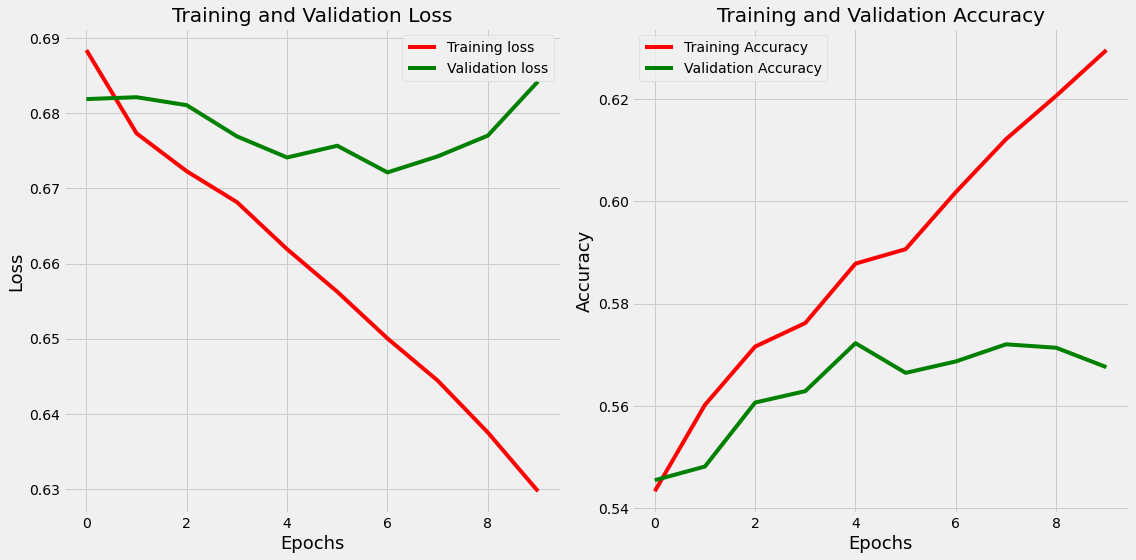

In [ ]:
def plot_auc_acc_loss(history, epochs):
    tacc = history.history['sparse_categorical_accuracy']
    tloss = history.history['loss']

    vacc = history.history['val_sparse_categorical_accuracy']
    vloss = history.history['val_loss']

    Epochs = [i for i in range(epochs)]

    plt.style.use('fivethirtyeight')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    axes[0].plot(Epochs, tloss, 'r', label='Training loss')
    axes[0].plot(Epochs, vloss, 'g', label='Validation loss')
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()

    axes[1].plot(Epochs, tacc, 'r', label='Training Accuracy')
    axes[1].plot(Epochs, vacc, 'g', label='Validation Accuracy')
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    return Epochs

Epochs = plot_auc_acc_loss(history, epochs=10)

Uso da matrix de confusão para verificar os valores obtidos.

Exposição dos resultados obtidos conforme métricas: 'precision' | 'recall' | 'f1-score'

there were 1936 errors in 4477 tests for an accuracy of  56.76%


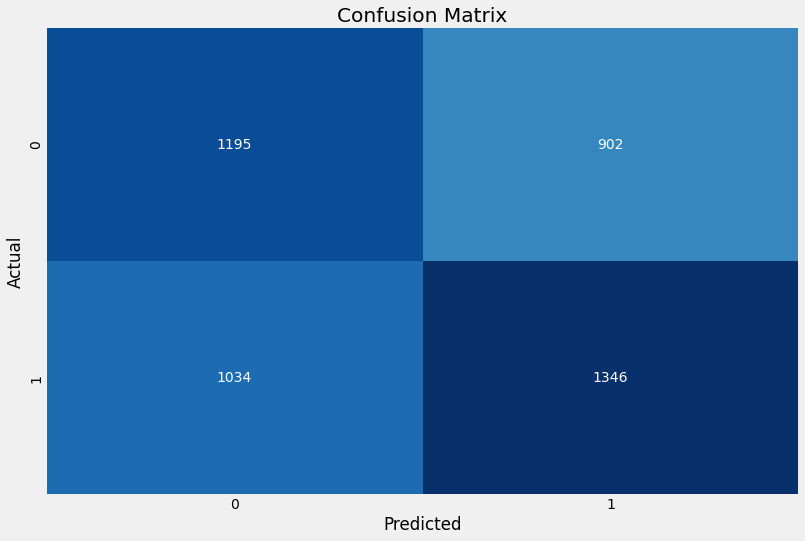

Classification Report:
----------------------
               precision    recall  f1-score   support

           0     0.5361    0.5699    0.5525      2097
           1     0.5988    0.5655    0.5817      2380

    accuracy                         0.5676      4477
   macro avg     0.5674    0.5677    0.5671      4477
weighted avg     0.5694    0.5676    0.5680      4477



In [ ]:
def predictor(test_ds):
    y_pred = []
    y_true = []
    errors = 0
    for X_test, y_test in test_ds:
        pred = tf.argmax(net.predict(X_test), axis=1)
        for i in range(len(pred)):
            pred_index = pred[i]
            true_index = y_test[i]
            if pred_index != true_index:
                errors += 1
            y_pred.append(pred_index)
            y_true.append(true_index)
            
    acc = (1 - errors / len(y_true)) * 100
    msg = f'there were {errors} errors in {len(y_true)} tests for an accuracy of {acc:6.2f}%'
    print(msg)
    ypred = np.array(y_pred)
    ytrue = np.array(y_true)
    f1score = f1_score(ytrue, ypred, average='weighted') * 100

    if len(set(ytrue)) <= 30:
        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    clr = classification_report(y_true, y_pred, digits=4)
    print("Classification Report:\n----------------------\n", clr)

    return errors, f1score

errors, f1score = predictor(test_ds)